In [1]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt
import os
from mpdaf.obj import Cube
from mpdaf.obj import WCS
from mpdaf.drs import PixTable
import astropy.io.fits as fits
import pandas as pd
from matplotlib import rc
import numpy.ma as ma
from PyAstronomy import pyasl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# from IPython.core.interactiveshell import InteractiveShell
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
# InteractiveShell.ast_node_interactivity = 'all'
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
rc('text', usetex=True)


path_s = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D', 'ESO_DEEP_offset_zapped_objects_sean.fits')
data_s =  fits.getdata(path_s, 1, ignore_missing_end=True)
path_w = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D', 'ESO_DEEP_offset_zapped_objects.fits')
data_w = fits.getdata(path_w, 1, ignore_missing_end=True)


ra_w, dec_w = data_w['ra'], data_w['dec']

ID_s = data_s['row']
ID_w = data_w['row']

name_s = data_s['name']
name_w = data_w['name']

ql_s = data_s['quality']
ql_w = data_w['quality']

cl_s = data_s['class']
cl_w = data_w['class']

cl_s_num = np.zeros_like(cl_s)
cl_w_num = np.zeros_like(cl_w)
classes = ['galaxy', 'star', 'quasar', 'hizgal']
for i in range(4):
    cl_s_num = np.where(cl_s != classes[i], cl_s_num, i)
    cl_w_num = np.where(cl_w != classes[i], cl_w_num, i)
    
cl_s_num = cl_s_num.astype(float)
cl_w_num = cl_w_num.astype(float)


z_s = data_s['redshift']
z_w = data_w['redshift']
z_qso = 0.6282144177077355

# cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
# d_c_qso = cosmo.comoving_distance(z=0.6282144177077355)
# d_c_w = cosmo.comoving_distance(z=z_w)
# d_c_s = cosmo.comoving_distance(z=z_s)
# H_qso = cosmo.H(z=0.6282144177077355)
# a_qso = cosmo.scale_factor(z=0.6282144177077355)
# H_0 = cosmo.H(z=0)
# a_0 = cosmo.scale_factor(z=0)
# v_w_0 = (H_0 * a_0 * (d_c_w - d_c_qso)).value
# v_s_0 = (H_0 * a_0 * (d_c_s - d_c_qso)).value

v_w = 3e5 * (z_w - z_qso) / (1 + z_qso)
v_s = 3e5 * (z_s - z_qso) / (1 + z_qso)

ct_s = data_s['comment']
ct_w = data_w['comment']

ql_mask = ma.masked_where(np.abs(ql_s - ql_w) == 0, ID_s)
ID_ql_diff = ID_s[~ql_mask.mask]
name_ql_diff = name_s[~ql_mask.mask]
ql_s_diff = ql_s[~ql_mask.mask]
ql_w_diff = ql_w[~ql_mask.mask]

cl_mask = ma.masked_where(np.abs(cl_s_num - cl_w_num) == 0, ID_s)
ID_cl_diff = ID_s[~cl_mask.mask]
name_cl_diff = name_s[~cl_mask.mask]
cl_s_diff = cl_s[~cl_mask.mask]
cl_w_diff = cl_w[~cl_mask.mask]

v_mask = ma.masked_where(np.abs(v_s - v_w) <= 20, ID_s)
ID_z_diff = ID_s[~v_mask.mask]
ql_s_z_diff = ql_s[~v_mask.mask]
ql_w_z_diff = ql_w[~v_mask.mask]
name_z_diff = name_s[~v_mask.mask]
z_s_diff = z_s[~v_mask.mask]
z_w_diff = z_w[~v_mask.mask]
v_s_diff = v_s[~v_mask.mask]
v_w_diff = v_w[~v_mask.mask]

# z_mask = ma.masked_where(np.abs(z_s - z_w) <= 0.02, ID_s)
# ID_z_diff = ID_s[~z_mask.mask]
# name_z_diff = name_s[~z_mask.mask]
# z_s_diff = z_s[~z_mask.mask]
# z_w_diff = z_w[~z_mask.mask]

# Table 1
columns_1 = [r"ID", r"Name", r"Sean's qua", r"Will's qua"]
ql_compare_1 = np.stack([ID_ql_diff, name_ql_diff, ql_s_diff, ql_w_diff], axis=1)
Table_1 = pd.DataFrame(ql_compare_1, index=1 + np.arange(len(ID_ql_diff)), columns=columns_1)
Table_1

columns_2 = [r"ID", r"Name", r"Sean's class", r"Will's class"]
ql_compare_2 = np.stack([ID_cl_diff, name_cl_diff, cl_s_diff, cl_w_diff], axis=1)
Table_2 = pd.DataFrame(ql_compare_2, index=1 + np.arange(len(ID_cl_diff)), columns=columns_2)
Table_2

columns_3 = [r"ID", r"Name", r"Sean's v", r"Will's v", r"qua", r"Will' z", r"Sean' z"]
ql_compare_3 = np.stack([ID_z_diff, name_z_diff, v_s_diff, v_w_diff, ql_s_z_diff, z_w_diff,  z_s_diff], axis=1)
Table_3 = pd.DataFrame(ql_compare_3, index=1 + np.arange(len(ID_z_diff)), columns=columns_3)
Table_3

,ID,Name,Sean's v,Will's v,qua,Will' z,Sean' z
1,1,J024034.53-185135.09,586.9464594377093,550.0962759806084,2,0.6311999999999987,0.6313999999999987
2,4,J024033.46-185150.64,881.747927094373,586.9464594377093,2,0.6313999999999987,0.6329999999999987
3,9,J024030.13-185154.07,116388.64797332579,116499.19852369686,2,1.2604999999999986,1.2598999999999996
4,13,J024034.91-185152.94,1231.8246699366778,1194.974486479802,2,0.6346999999999998,0.6348999999999987
5,14,J024034.69-185141.90,98313.63298762568,98110.95697861174,0,1.1606999999999987,1.1617999999999986
6,18,J024030.41-185158.82,521359.53233461466,521453.673112845,2,3.4583423801377045,3.4578314422296748
7,19,J024032.88-185115.19,189773.00088857245,189748.35750750353,2,1.6580511224746657,1.658184871502524
8,22,J024032.65-185119.30,40956.32243667371,122238.84279166294,0,1.2916512384987184,0.8504999999999986
9,28,J024032.93-185123.58,895600.5046038604,895680.4449246431,2,5.48941379799168,5.488979931382164
10,29,J024032.54-185124.35,-17764.444902190357,-17727.59471873328,1,0.5319999999999987,0.5317999999999987


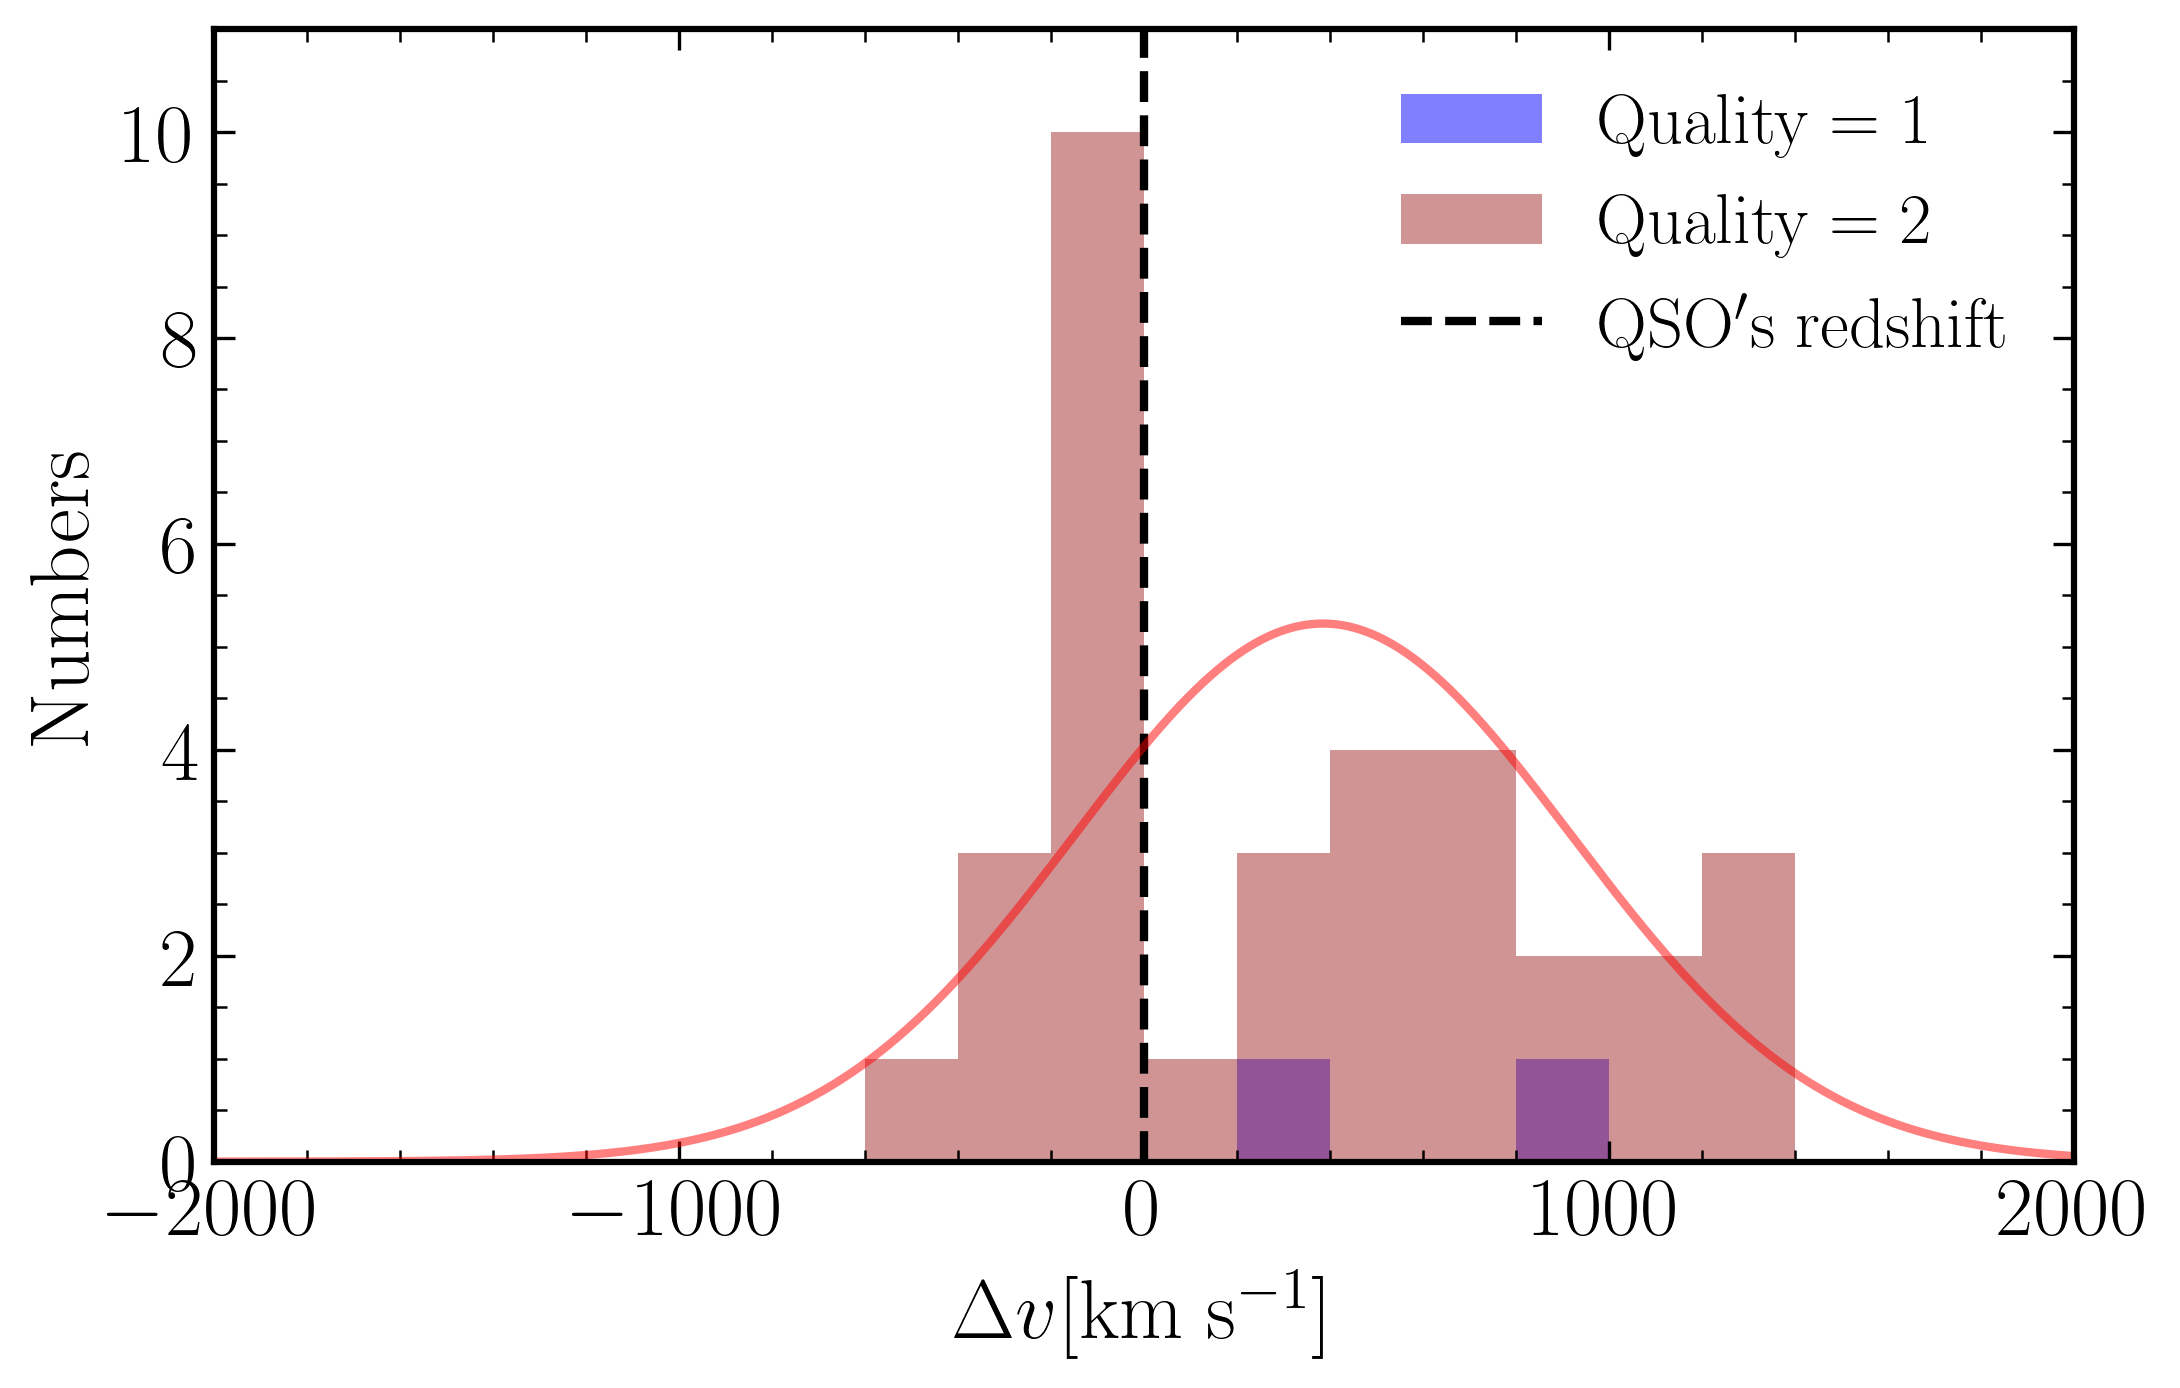

In [24]:
from scipy.stats import norm

select_gal = np.where(cl_w == 'galaxy')
ID_gal = ID_w[select_gal]
z_gal = z_w[select_gal]
ql_gal = ql_w[select_gal]
ra_gal, dec_gal = ra_w[select_gal], dec_w[select_gal]

select_qua = np.where((ql_gal == 1) | (ql_gal == 2))
ID_qua = ID_gal[select_qua]
z_qua = z_gal[select_qua]
v_qua = 3e5 * (z_qua - z_qso) / (1 + z_qso)
ql_qua = ql_gal[select_qua]
ra_qua, dec_qua = ra_gal[select_qua], dec_gal[select_qua]

bins = np.arange(-2000, 2200, 200)
select_z = np.where((v_qua > bins[0]) * (v_qua < bins[-1]))
ID_final = ID_qua[select_z]
z_final = z_qua[select_z]
v_final = v_qua[select_z]
ql_final = ql_qua[select_z]
ra_final, dec_final = ra_qua[select_z], dec_qua[select_z]

# fit
select_v = np.where((v_final > -2000) * (v_final < 2000))
v_fit = v_final[select_v]
mu, scale = norm.fit(v_fit)

# Normalization
nums, v_edge = np.histogram(v_fit, bins=bins)
normalization = np.sum(nums) * 200 

# 
rv = np.linspace(-2000, 2000, 1000)
plt.figure(figsize=(8, 5), dpi=300)
plt.vlines(0, 0, 11, linestyles='--', color='k', label=r"$\mathrm{QSO's \; redshift}$")
plt.hist(v_final[np.where(ql_final == 1)], bins=bins, facecolor='blue', histtype='stepfilled', alpha=0.5, label=r'$ \mathrm{Quality} = 1$')
plt.hist(v_final[np.where(ql_final == 2)], bins=bins, facecolor='brown', histtype='stepfilled', alpha=0.5, label=r'$ \mathrm{Quality} = 2$')
plt.plot(rv, normalization * norm.pdf(rv, mu, scale), '-r', lw=2, alpha=0.5)

plt.xlim(-2000, 2000)
plt.ylim(0, 11)
plt.minorticks_on()
plt.xlabel(r'$\Delta v [\mathrm{km \; s^{-1}}]$', size=20)
plt.ylabel(r'$\mathrm{Numbers}$', size=20)
plt.tick_params(axis='both', which='major', direction='in', bottom='on', top='on', left='on', right='on', size=5, labelsize=20)
plt.tick_params(axis='both', which='minor', direction='in', bottom='on', top='on', left='on', right='on', size=3)
plt.legend(prop={'size': 17}, framealpha=0, loc=1, fontsize=15)

# # Redshift bins 
# # bins = np.linspace(0.6282144177077355 - 0.025, 0.6282144177077355 + 0.025, 50)
# bins = np.linspace(0.626, 0.636, 21)
# select_z = np.where((z_qua > bins[0]) * (z_qua < bins[-1]))
# ID_final = ID_qua[select_z]
# z_final = z_qua[select_z]
# ql_final = ql_qua[select_z]
# ra_final, dec_final = ra_qua[select_z], dec_qua[select_z]

# # print((0.636 - 0.626) / 0.0005)
# # qso redshift: z = 0.6282144177077355
# plt.figure(figsize=(8, 5), dpi=300)
# plt.vlines(0.6282144177077355, 0, 6, linestyles='--', color='k', label=r"$\mathrm{QSO's \; redshift}$")
# plt.hist(z_final[np.where(ql_final == 1)], bins=bins, facecolor='blue', histtype='stepfilled', alpha=0.5, label=r'$ \mathrm{Quality} = 1$')
# plt.hist(z_final[np.where(ql_final == 2)], bins=bins, facecolor='brown', histtype='stepfilled', alpha=0.5, label=r'$ \mathrm{Quality} = 2$')

# plt.xlim(bins[0], bins[-1])
# plt.ylim(0, 6)
# plt.minorticks_on()
# plt.xlabel(r'$\mathrm{Redshift}$', size=20)
# plt.ylabel(r'$\mathrm{Numbers}$', size=20)
# plt.tick_params(axis='both', which='major', direction='in', bottom='on', top='on', left='on', right='on', size=5, labelsize=20)
# plt.tick_params(axis='both', which='minor', direction='in', bottom='on', top='on', left='on', right='on', size=3)
# plt.legend(prop={'size': 17}, framealpha=0, loc=1, fontsize=15)

In [3]:
# # Velocity dipersion
# amplitude_array = np.zeros_like(v_final)
# for i in range(len(bins) - 1):
#     sort = np.where((v_final < bins[i + 1]) * (v_final > bins[i]))
#     amplitude_array[sort] = nums[i]

# mu_guess = -100
# sigma_guess = 1100
# amplitude_guess = 5000
# parameters = lmfit.Parameters()
# parameters.add_many(('mu', mu_guess, True, -1000, 1000, None),
#                     ('sigma', sigma_guess, True, 0, None, None),
#                     ('amplitude', amplitude_guess, True, 0, None, None))
# spec_model = lmfit.Model(model, missing='drop')

# result = spec_model.fit(nums, v=v_mid, params=parameters)
# print('Success = {}'.format(result.success))
# print(result.fit_report())

# mu = result.best_values['mu']
# sigma = result.best_values['sigma']
# amplitude = result.best_values['amplitude']



In [4]:
path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'ESO_DEEP_offset.fits')

cube = Cube(path)
hdul = fits.open(path)  # open a FITS file
hdr = hdul[1].header 
wcs = WCS(hdr)

# Calculate the white image
image_white = cube.sum(axis=0)
p, q = image_white.peak()['p'], image_white.peak()['q']
p_q = wcs.sky2pix(np.vstack((dec_final, ra_final)).T, nearest=True)
p_gal, q_gal = p_q.T[0], p_q.T[1]

In [5]:
# hdul = fits.open(path)  # open a FITS file
# hdr = hdul[2].header 
# wcs = WCS(hdr)
# print(wcs)

/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  if __name__ == '__main__':
/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  if sys.path[0] == '':


[  1   4   5   6   7  62  64  68  78  80  83  88  93 129 134 140 141 149
 162 164 179 181 182]


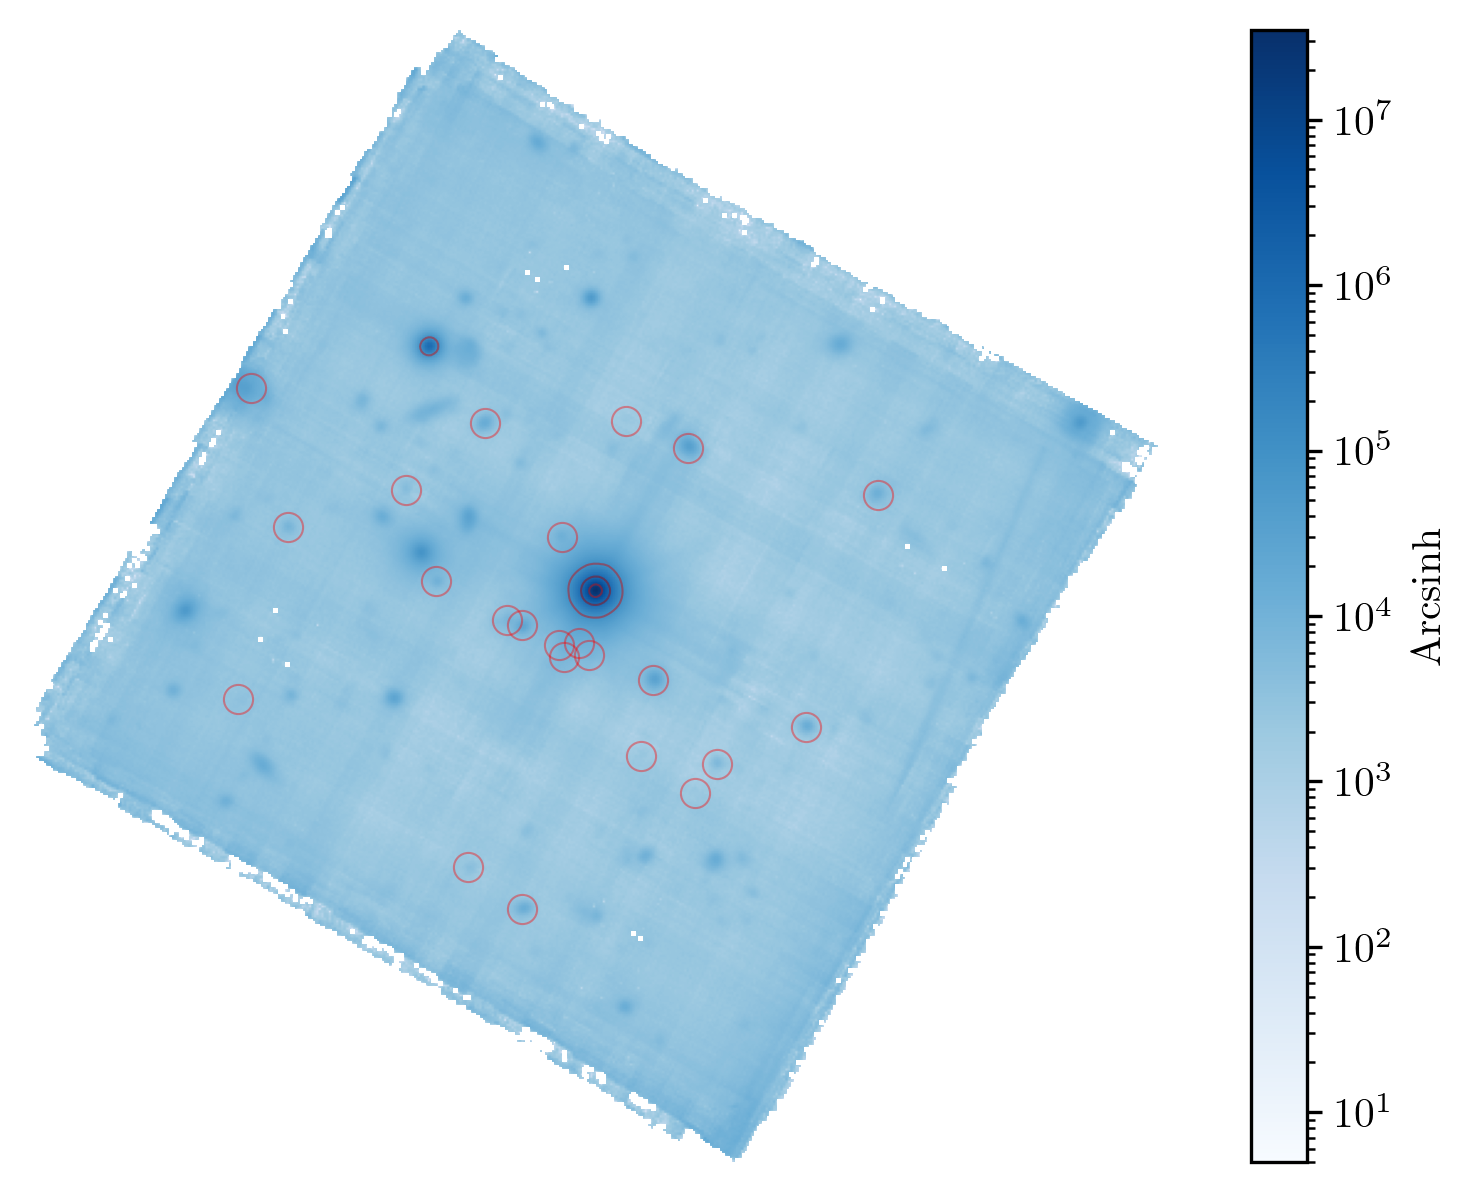

In [6]:
import matplotlib
Blues = cm.get_cmap('Blues', 256)
Reds = cm.get_cmap('Reds', 256)
newcolors = Blues(np.linspace(0, 1, 256))
newcolors_red = Reds(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors)

plt.figure(figsize=(8, 5), dpi=300)
plt.imshow(image_white.data, origin='lower', vmin=5, cmap=newcmp, norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
cbar.set_label(r'$\mathrm{Arcsinh}$')
plt.contour(image_white.data, levels=[1e5, 1e6, 1e7, 1e8], colors=newcolors_red[200::30, :], linewidths=0.5, alpha=0.5, norm=matplotlib.colors.LogNorm())

plt.plot(q_gal, p_gal, 'o', color='brown', ms=7, alpha=0.4, markerfacecolor='None', markeredgecolor='red', markeredgewidth=0.5)
plt.axis('off')
#plt.xlim(200, 250)
#plt.ylim(200, 250)
print(ID_final)

[INFO] 36 spaxels used


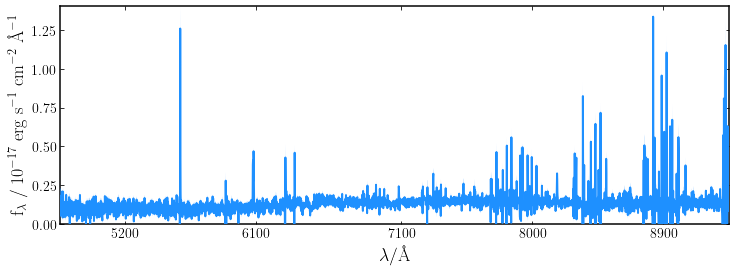


Bagpipes: fitting object 1

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    4
 resuming from previous job
 *****************************************************

Completed in 0.0 seconds.
 ln(ev)=  -7.3335434946919520E-016 +/-   1.3540258024398900E-009
 Total Likelihood Evaluations:          400
 Sampling finished. Exiting MultiNest



ValueError: could not convert string to float: '0.247032822920623272-322'

In [7]:
import bagpipes as pipes

eg_filt_list = ["list", "of", "filters"]

def load_data(ID):
    ID_sort = np.where(ID_final == float(ID))
    cube_ape = cube.aperture((p_gal[ID_sort][0], q_gal[ID_sort][0]), 0.6, unit_center=None, is_sum=True)
    wave_vac = pyasl.airtovac2(cube_ape.wave.coord())
    flux = cube_ape.data * 1e-20
    flux_err = np.sqrt(cube_ape.var) * 1e-20

    return np.array([wave_vac, flux, flux_err]).T


ID_number = '1'
galaxy = pipes.galaxy(ID_number, load_data, filt_list=eg_filt_list, photometry_exists=False)

galaxy.plot()
burst = {}
burst["age"] = (0., 15.)                  # Vary age from 0 to 15 Gyr
burst["metallicity"] = (0., 2.5)          # Vary metallicity from 0 to 2.5 Solar
burst["massformed"] = (0., 13.)           # Vary log_10(mass formed) from 0 to 13

fit_instructions = {}
fit_instructions["burst"] = burst         # Add the burst sfh component to the fit
fit_instructions["redshift"] = (0., 1.)  # Vary observed redshift from 0 to 10

# # burst1 = {}                                   # A burst component
# # burst1["age"] = 0.1                           # Fix age to 0.1 Gyr
# # burst1["metallicity"] = (0., 2.5)             # Vary metallicity from 0 to 2.5 Solar
# # burst1["massformed"] = (0., 13.)              # Vary log_10(mass formed) from 0 to 13

# # burst2 = {}                                   # A second burst component
# # burst2["age"] = 1.0                           # Fix the age to 1.0 Gyr
# # burst2["metallicity"] = "burst1:metallicity"  # Mirror burst1:metallicity
# # burst2["massformed"] = (0., 13.)              # Vary log_10(mass formed) from 0 to 13

# # fit_instructions = {}
# # fit_instructions["burst1"] = burst1           # Add the burst1 sfh component to the fit
# # fit_instructions["burst2"] = burst2           # Add the burst2 sfh component to the fit
# # fit_instructions["redshift"] = (0., 10.)      # Vary observed redshift from 0 to 10

# # component = {}
# # component["parameter_prior"] = "uniform"   # Uniform prior
# # component["parameter_prior"] = "log_10"    # Uniform in log_10(parameter)
# # component["parameter_prior"] = "log_e"     # Uniform in log_e(parameter)
# # component["parameter_prior"] = "pow_10"    # Uniform in 10**parameter
# # component["parameter_prior"] = "recip"     # Uniform in 1/parameter
# # component["parameter_prior"] = "recipsq"   # Uniform in 1/parameter**2

# # component["parameter_prior"] = "Gaussian"  # Gaussian, also requires:
# # component["parameter_prior_mu"] = 0.5      # Gaussian mean
# # component["parameter_prior_sigma"] = 0.1   # Gaussian standard dev.

# galaxy.plot()
fit = pipes.fit(galaxy, fit_instructions)
fit.fit()
fit.plot_spectrum_posterior()  # Shows the input and fitted spectrum/photometry
fit.plot_sfh_posterior()       # Shows the fitted star-formation history
fit.plot_1d_posterior()        # Shows 1d posterior probability distributions
fit.plot_corner() 

# plt.figure(figsize=(8, 5))
# plt.plot(wave_vac, flux, '-')
# plt.plot(wave_vac, flux_err, '-')